In [3]:
import pandas as pd

# 1. 直接读取你的 Project1.csv
df = pd.read_csv("Project1.csv")

# 2. 检查前几行、所有列名
print(df.head())
print(df.columns.tolist())
print("总行数：", len(df))


C:\Users\wt321\AppData\Local\Temp\ipykernel_52776\3977270256.py:4: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Project1.csv")


             SID SEASON NUMBER BASIN SUBBASIN    NAME        ISO_TIME NATURE  \
0                  Year                                                        
1  2000125N06136   2000     29    WP       MM  DAMREY  2000/5/3 18:00     TS   
2  2000125N06136   2000     29    WP       MM  DAMREY  2000/5/3 21:00     TS   
3  2000125N06136   2000     29    WP       MM  DAMREY   2000/5/4 0:00     TS   
4  2000125N06136   2000     29    WP       MM  DAMREY   2000/5/4 3:00     TS   

             LAT           LON  ... BOM_GUST_PER REUNION_GUST  \
0  degrees_north  degrees_east  ...       second          kts   
1            6.2         135.7  ...                             
2            6.8         135.5  ...                             
3            7.3         135.4  ...                             
4            7.7         135.3  ...                             

  REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW  \
0           second         ft         nmile         n

In [5]:
# 假设你的列名分别是：SEASON、LAT、LON、WMO_WIND、WMO_PRES
columns_to_use = ['SEASON', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES']

df = df[columns_to_use].copy()
df.columns = ['Year', 'Latitude', 'Longitude', 'Wind_kts', 'Pressure_mb']

# 转换为数值并去除空值
for col in ['Latitude', 'Longitude', 'Wind_kts', 'Pressure_mb']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

print("有效样本数：", len(df))
print(df.head())


有效样本数： 14908
    Year  Latitude  Longitude  Wind_kts  Pressure_mb
27  2000      13.1      131.7      45.0        992.0
29  2000      13.4      131.4      55.0        985.0
31  2000      13.6      131.4      55.0        980.0
33  2000      13.7      131.4      60.0        975.0
35  2000      14.0      131.6      65.0        970.0


In [7]:
# 将清洗后的 DataFrame 保存为新的 CSV 文件
output_filename = "available_data.csv"
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"文件已保存为：{output_filename}，可直接用于后续建模分析。")


文件已保存为：available_data.csv，可直接用于后续建模分析。


In [9]:
import matplotlib.pyplot as plt

# 基本描述统计
print(df.describe())



           Latitude     Longitude      Wind_kts   Pressure_mb
count  14908.000000  14908.000000  14908.000000  14908.000000
mean      21.746358    135.016743     59.899047    973.816139
std        7.644112     19.716720     21.139827     23.308411
min        0.400000     78.000000     15.000000    885.000000
25%       16.000000    124.100000     40.000000    960.000000
50%       21.200000    131.600000     55.000000    980.000000
75%       27.000000    142.000000     75.000000    992.000000
max       48.600000    257.400000    140.000000   1012.000000


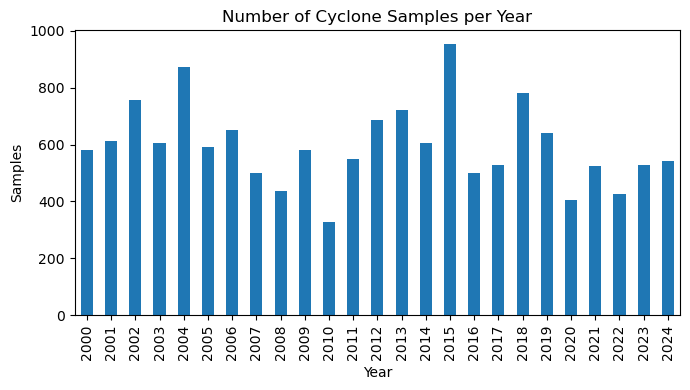

In [13]:

# 先强制把 Year 列转为整数类型（或者先转为字符串再转为 int）
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# 可视化1：年份分布
plt.figure(figsize=(7,4))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Samples')
plt.title('Number of Cyclone Samples per Year')
plt.tight_layout()
plt.show()




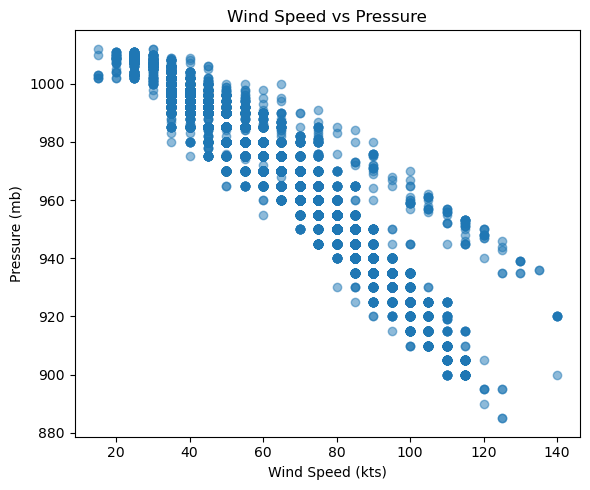

In [15]:
# 可视化2：风速-气压关系
plt.figure(figsize=(6,5))
plt.scatter(df['Wind_kts'], df['Pressure_mb'], alpha=0.5)
plt.xlabel('Wind Speed (kts)')
plt.ylabel('Pressure (mb)')
plt.title('Wind Speed vs Pressure')
plt.tight_layout()
plt.show()


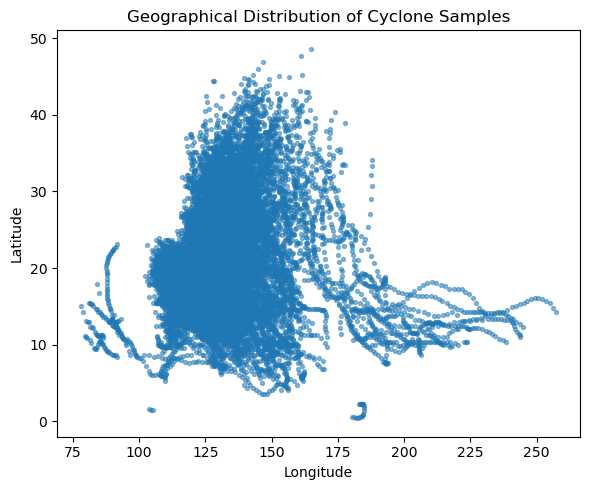

In [17]:
# 可视化3：经纬度地理分布
plt.figure(figsize=(6,5))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Cyclone Samples')
plt.tight_layout()
plt.show()


In [ ]:
## 3训练测试集分割


In [19]:
from sklearn.model_selection import train_test_split

# 只选风速和气压作为特征
X = df[['Wind_kts', 'Pressure_mb']]
y_lat = df['Latitude']
y_lon = df['Longitude']

# 划分训练集和测试集（20% 测试集，80% 训练集）
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(
    X, y_lat, y_lon, test_size=0.2, random_state=42
)
print("训练集样本数:", len(X_train), "测试集样本数:", len(X_test))


训练集样本数: 11926 测试集样本数: 2982


In [ ]:
## 预测


In [21]:
from sklearn.ensemble import RandomForestRegressor

# 分别训练纬度和经度的随机森林回归模型
model_lat = RandomForestRegressor(n_estimators=100, random_state=42)
model_lon = RandomForestRegressor(n_estimators=100, random_state=42)
model_lat.fit(X_train, y_lat_train)
model_lon.fit(X_train, y_lon_train)

# 进行预测
pred_lat = model_lat.predict(X_test)
pred_lon = model_lon.predict(X_test)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 计算误差指标
mae_lat = mean_absolute_error(y_lat_test, pred_lat)
mae_lon = mean_absolute_error(y_lon_test, pred_lon)
rmse_lat = mean_squared_error(y_lat_test, pred_lat, squared=False)
rmse_lon = mean_squared_error(y_lon_test, pred_lon, squared=False)

print("纬度的平均绝对误差 MAE:", mae_lat)
print("经度的平均绝对误差 MAE:", mae_lon)
print("纬度的均方根误差 RMSE:", rmse_lat)
print("经度的均方根误差 RMSE:", rmse_lon)

# 保存预测结果
results = pd.DataFrame({
    'True_Lat': y_lat_test.values,
    'Pred_Lat': pred_lat,
    'True_Lon': y_lon_test.values,
    'Pred_Lon': pred_lon
})
results['Lat_Error'] = abs(results['True_Lat'] - results['Pred_Lat'])
results['Lon_Error'] = abs(results['True_Lon'] - results['Pred_Lon'])
results.to_csv("prediction_results.csv", index=False)
print("结果表格已保存为 prediction_results.csv")


纬度的平均绝对误差 MAE: 5.508526380545537
经度的平均绝对误差 MAE: 10.754614674350178
纬度的均方根误差 RMSE: 6.909276937891674
经度的均方根误差 RMSE: 14.21727887531328
结果表格已保存为 prediction_results.csv


D:\ANACONDA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


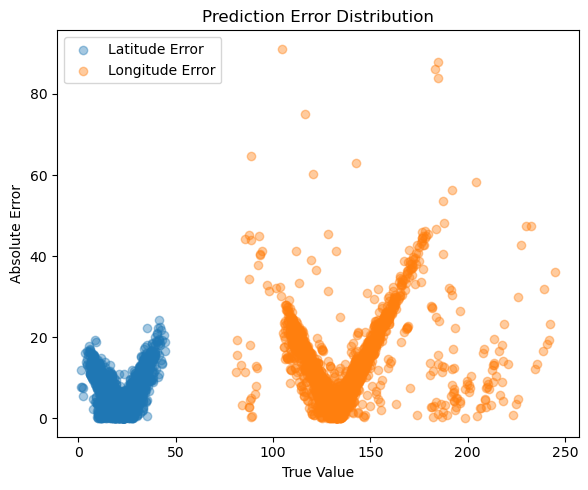

In [25]:
# 残差散点图
plt.figure(figsize=(6,5))
plt.scatter(results['True_Lat'], results['Lat_Error'], alpha=0.4, label='Latitude Error')
plt.scatter(results['True_Lon'], results['Lon_Error'], alpha=0.4, label='Longitude Error')
plt.xlabel('True Value')
plt.ylabel('Absolute Error')
plt.title('Prediction Error Distribution')
plt.legend()
plt.tight_layout()
plt.show()


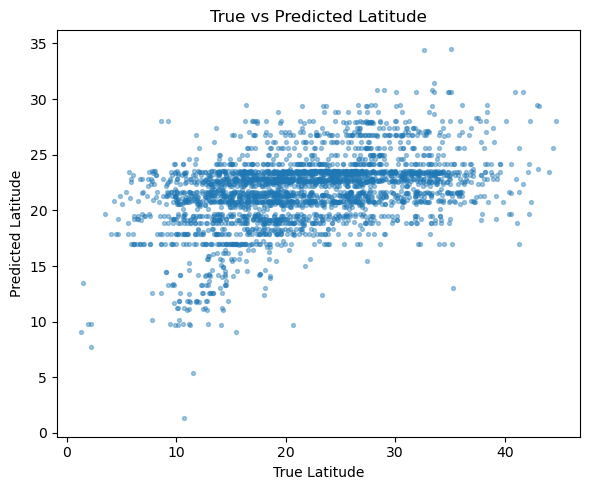

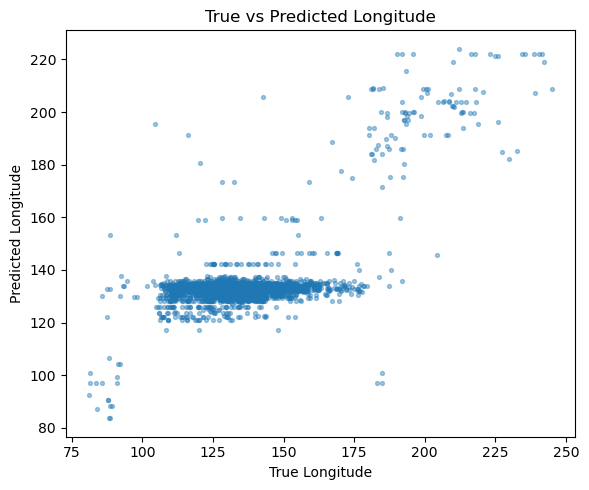

In [27]:
# 真实 vs 预测对比图（纬度、经度各一张）
plt.figure(figsize=(6,5))
plt.scatter(results['True_Lat'], results['Pred_Lat'], alpha=0.4, s=8)
plt.xlabel('True Latitude')
plt.ylabel('Predicted Latitude')
plt.title('True vs Predicted Latitude')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(results['True_Lon'], results['Pred_Lon'], alpha=0.4, s=8)
plt.xlabel('True Longitude')
plt.ylabel('Predicted Longitude')
plt.title('True vs Predicted Longitude')
plt.tight_layout()
plt.show()